In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('AXISBANK.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
61/61 [==============================] - 5s 8ms/step - loss: 0.0310
Epoch 2/50
61/61 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 3/50
61/61 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 4/50
61/61 [==============================] - 1s 8ms/step - loss: 4.5228e-04
Epoch 5/50
61/61 [==============================] - 0s 7ms/step - loss: 2.1408e-04
Epoch 6/50
61/61 [==============================] - 0s 7ms/step - loss: 1.5908e-04
Epoch 7/50
61/61 [==============================] - 0s 7ms/step - loss: 1.5415e-04
Epoch 8/50
61/61 [==============================] - 0s 6ms/step - loss: 1.4791e-04
Epoch 9/50
61/61 [==============================] - 0s 7ms/step - loss: 1.4336e-04
Epoch 10/50
61/61 [==============================] - 0s 7ms/step - loss: 1.4478e-04
Epoch 11/50
61/61 [==============================] - 0s 6ms/step - loss: 1.3859e-04
Epoch 12/50
61/61 [==============================] - 0s 7ms/step - loss: 1.4051e-04
Epoch 13/50
6

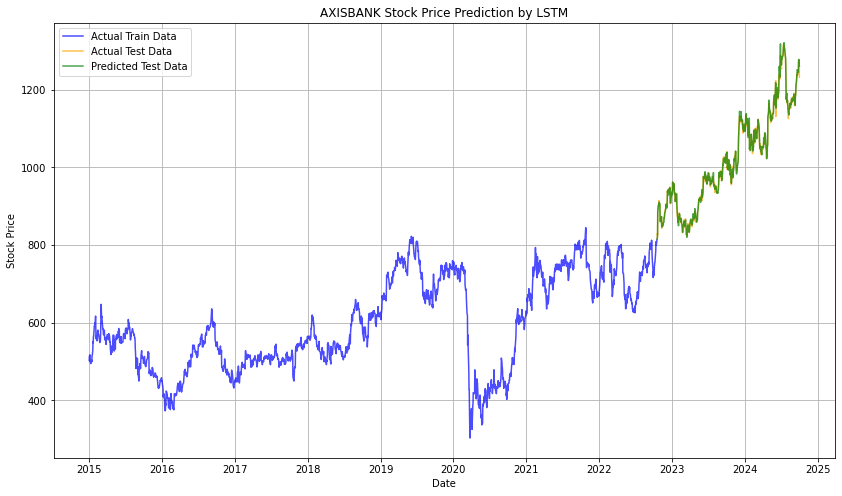

In [2]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("AXISBANK Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('HDFCBANK.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")



Epoch 1/50
61/61 [==============================] - 4s 14ms/step - loss: 0.1047
Epoch 2/50
61/61 [==============================] - 1s 9ms/step - loss: 0.0141
Epoch 3/50
61/61 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 4/50
61/61 [==============================] - 0s 7ms/step - loss: 7.9952e-04
Epoch 5/50
61/61 [==============================] - 0s 7ms/step - loss: 6.7846e-04
Epoch 6/50
61/61 [==============================] - 0s 7ms/step - loss: 5.6791e-04
Epoch 7/50
61/61 [==============================] - 0s 7ms/step - loss: 4.5921e-04
Epoch 8/50
61/61 [==============================] - 0s 7ms/step - loss: 3.7638e-04
Epoch 9/50
61/61 [==============================] - 0s 7ms/step - loss: 2.9449e-04
Epoch 10/50
61/61 [==============================] - 0s 6ms/step - loss: 2.4736e-04
Epoch 11/50
61/61 [==============================] - 0s 6ms/step - loss: 1.9301e-04
Epoch 12/50
61/61 [==============================] - 0s 6ms/step - loss: 1.6317e-04
Epoch 13/50


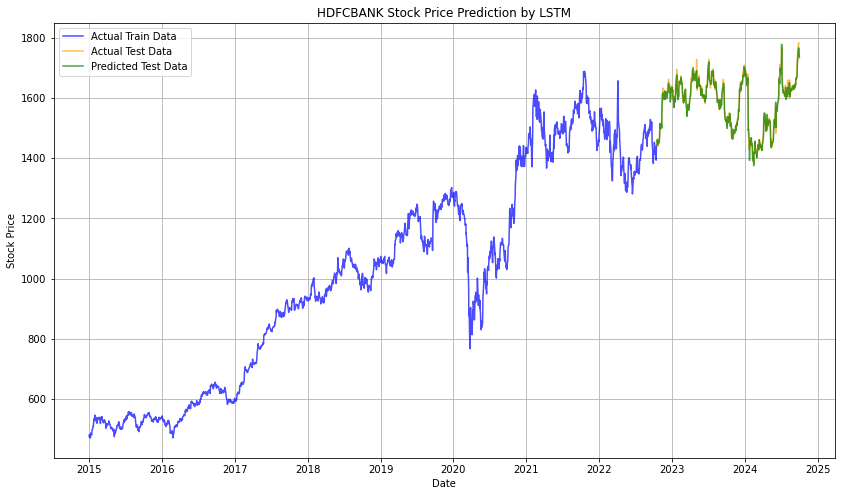

In [4]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("HDFCBANK Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('ICICIBANK.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
61/61 [==============================] - 3s 13ms/step - loss: 0.0257
Epoch 2/50
61/61 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 3/50
61/61 [==============================] - 0s 8ms/step - loss: 1.8351e-04
Epoch 4/50
61/61 [==============================] - 0s 7ms/step - loss: 1.4070e-04
Epoch 5/50
61/61 [==============================] - 0s 7ms/step - loss: 1.2229e-04
Epoch 6/50
61/61 [==============================] - 0s 6ms/step - loss: 1.0743e-04
Epoch 7/50
61/61 [==============================] - 0s 6ms/step - loss: 9.5023e-05
Epoch 8/50
61/61 [==============================] - 0s 7ms/step - loss: 8.5902e-05
Epoch 9/50
61/61 [==============================] - 0s 7ms/step - loss: 7.1712e-05
Epoch 10/50
61/61 [==============================] - 0s 7ms/step - loss: 6.1679e-05
Epoch 11/50
61/61 [==============================] - 0s 7ms/step - loss: 5.3452e-05
Epoch 12/50
61/61 [==============================] - 0s 7ms/step - loss: 4.7925e-05
Epoch 13

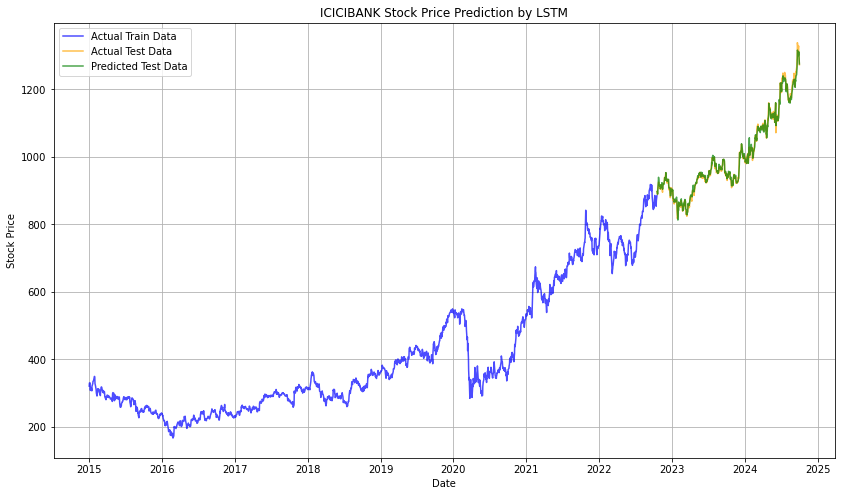

In [6]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("ICICIBANK Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('KOTAKBANK.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
61/61 [==============================] - 3s 13ms/step - loss: 0.0952
Epoch 2/50
61/61 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 3/50
61/61 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 4/50
61/61 [==============================] - 0s 6ms/step - loss: 8.4627e-04
Epoch 5/50
61/61 [==============================] - 0s 6ms/step - loss: 7.4618e-04
Epoch 6/50
61/61 [==============================] - 0s 6ms/step - loss: 6.5695e-04
Epoch 7/50
61/61 [==============================] - 0s 6ms/step - loss: 5.6492e-04
Epoch 8/50
61/61 [==============================] - 0s 7ms/step - loss: 4.7647e-04
Epoch 9/50
61/61 [==============================] - 0s 6ms/step - loss: 3.9739e-04
Epoch 10/50
61/61 [==============================] - 0s 6ms/step - loss: 3.3958e-04
Epoch 11/50
61/61 [==============================] - 0s 6ms/step - loss: 2.7664e-04
Epoch 12/50
61/61 [==============================] - 0s 6ms/step - loss: 2.3435e-04
Epoch 13/50


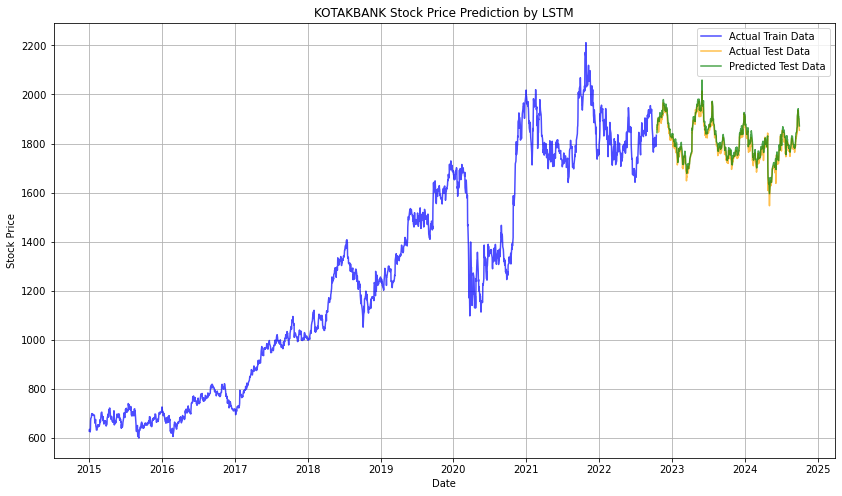

In [8]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("KOTAKBANK Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('SBIN.csv')

# Ensure the 'Date' column is in datetime format and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Splitting the data into features (X) and target (y)
X = data[["Open", "High", "Low", "Volume"]].values
y = data["Close"].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting into training and testing sets (time series split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
date_train, date_test = data['Date'].iloc[:train_size], data['Date'].iloc[train_size:]

# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting the stock prices
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
61/61 [==============================] - 3s 12ms/step - loss: 0.0208
Epoch 2/50
61/61 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 3/50
61/61 [==============================] - 0s 8ms/step - loss: 1.3969e-04
Epoch 4/50
61/61 [==============================] - 0s 6ms/step - loss: 1.0812e-04
Epoch 5/50
61/61 [==============================] - 0s 6ms/step - loss: 9.4468e-05
Epoch 6/50
61/61 [==============================] - 0s 6ms/step - loss: 7.9805e-05
Epoch 7/50
61/61 [==============================] - 0s 7ms/step - loss: 6.9216e-05
Epoch 8/50
61/61 [==============================] - 0s 7ms/step - loss: 6.0760e-05
Epoch 9/50
61/61 [==============================] - 0s 6ms/step - loss: 4.9902e-05
Epoch 10/50
61/61 [==============================] - 0s 7ms/step - loss: 4.4205e-05
Epoch 11/50
61/61 [==============================] - 0s 6ms/step - loss: 4.0155e-05
Epoch 12/50
61/61 [==============================] - 0s 7ms/step - loss: 3.4860e-05
Epoch 13

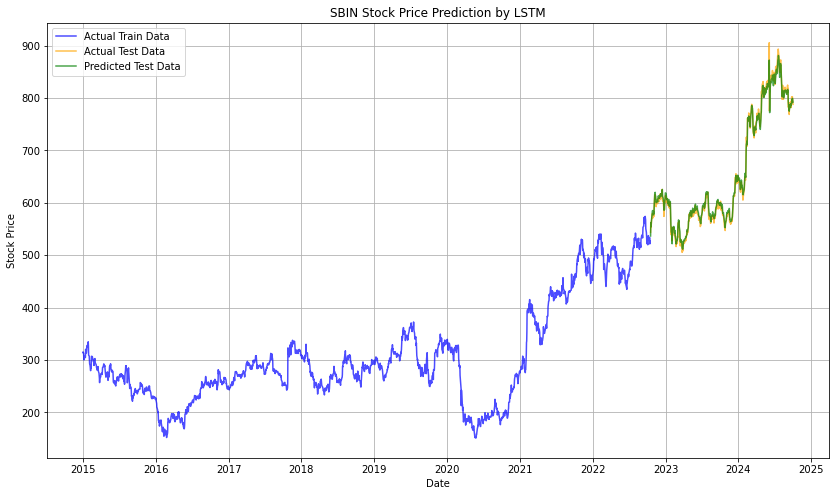

In [10]:
# Visualization of Actual vs Predicted with Date
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(date_train, y_train_actual, label="Actual Train Data", color='blue', alpha=0.7)
#plt.plot(date_train, y_train_pred, label="Predicted Train Data", color='cyan', alpha=0.7)

# Plot test data
plt.plot(date_test, y_test_actual, label="Actual Test Data", color='orange', alpha=0.7)
plt.plot(date_test, y_test_pred, label="Predicted Test Data", color='green', alpha=0.7)

# Formatting the plot
plt.title("SBIN Stock Price Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()